In [245]:
import pandas as pd
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup 
import nltk
import numpy as np
import re
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def raw_text(url):
    """Takes a URL as input and performs web scrapping to retrieve the body of the
    webpage (in this case a Linkedin ad)"""
    ad = requests.get(url) #Retrieve webpage
    Html = BeautifulSoup(ad.text, 'html.parser') #Convert html into a nicer format
    text_body = Html.find_all('div', 
                              {'class':"show-more-less-html__markup show-more-less-html__markup--clamp-after-5"})
    text_body = text_body[0].text
    return text_body
def clean_text(doc):
    """Take an unstructured document and tokenize it into a list of words. 
    Then standardize it by lowercasing and lemmatizing each word"""
    words = re.findall(r'(?:[a-zA-Z]|#|"+")+',doc) #Find all alphabetical words (Preserve + and # for C++ and C#)
    clean = [i for i in words if i.isupper() or i.islower()] #Retrieve all words that aren't glued to each other
    dirty = [i for i in words if not i.islower() and not i.isupper()] #Retrieve words stuck together
    dirty = [re.findall('[a-zA-Z][^A-Z]*',i) for i in dirty] #Split all the tangled words ie split 'ThisExample' into ['This','Example']
    clean2 = [j for i in dirty for j in i] #Unlist the list of lists
    words = clean + clean2 #Combine all the words together
    stopwords = nltk.corpus.stopwords.words("english")
    words = [i.lower() for i in words] #Lowercase all words
    words = [i for i in words if i not in stopwords] #Filter out stopwords
    tag_words = nltk.pos_tag(words) #Begin lemmatizing by tagging each word
    tag_words = [(i, wordnet_pos(j)) for (i, j) in tag_words] #Convert the tags into something the lemmatizer understands
    lemmatizer = nltk.WordNetLemmatizer()
    clean_words = [lemmatizer.lemmatize(i, j) for i, j in tag_words] #Lemmatize the words
    #Document should be cleaned up
    return clean_words
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN) #Function created by Bo Ning in Week 6-2
def unlist(LIST):
    "Take a list and concatenate all objects inside"
    STRING = ''
    for i in LIST:
        STRING = STRING +' '+ i
    STRING = STRING.strip() #Get rid of white space
    return STRING

In [246]:
analyst = pd.read_csv('data_analyst.csv')
science = pd.read_csv('data_scientist.csv')

In [247]:
df = pd.concat([analyst,science])
df = df.iloc[:,1:]
df = df.reset_index(drop = True)
df

,Languages,Salary,Machine Learning,Education,Benefits,Experience,url,Type
0,2,96955.0,No,Master,Yes,1.0,https://www.linkedin.com/jobs/view/3249211510/...,Analyst
1,6,96955.0,No,Master,No,1.0,https://www.linkedin.com/jobs/view/3487242175/...,Analyst
2,4,96955.0,No,Bachelor,Yes,1.0,https://www.linkedin.com/jobs/view/3505418682/...,Analyst
3,0,96955.0,No,Unspecified,No,2.0,https://www.linkedin.com/jobs/view/3498974602/...,Analyst
4,6,96955.0,No,Unspecified,No,5.0,https://www.linkedin.com/jobs/view/3508607089/...,Analyst
...,...,...,...,...,...,...,...,...
195,6,"$144,500.00",Yes,Unspecified,Yes,0.0,https://www.linkedin.com/jobs/view/3483125003/...,Scientist
196,5,"$144,500.00",Yes,Master,Yes,0.0,https://www.linkedin.com/jobs/view/3485548898/...,Scientist
197,6,"$162,000.00",No,Bachelor,No,0.0,https://www.linkedin.com/jobs/view/3507782958/...,Scientist
198,4,"$144,500.00",Yes,Master,Yes,3.0,https://www.linkedin.com/jobs/view/3494351211/...,Scientist


In [248]:
analysts = df.loc[df['Type'] == 'Analyst','url']
analysts = analysts.tolist()

In [249]:
scientists = df.loc[df['Type'] == 'Scientist','url']
scientists = scientists.tolist()

In [250]:
anl_text1 = [raw_text(i) for i in analysts[:10]]

In [251]:
anl_text2 = [raw_text(i) for i in analysts[10:20]]

In [252]:
anl_text3 = [raw_text(i) for i in analysts[20:30]]

In [253]:
anl_text4 = [raw_text(i) for i in analysts[30:40]]

In [254]:
anl_text5 = [raw_text(i) for i in analysts[40:50]]

In [255]:
anl_text6 = [raw_text(i) for i in analysts[50:60]]

In [256]:
anl_text7 = [raw_text(i) for i in analysts[60:70]]

In [257]:
anl_text8 = [raw_text(i) for i in analysts[70:80]]

In [258]:
anl_text9 = [raw_text(i) for i in analysts[80:90]]

In [259]:
anl_text10 = [raw_text(i) for i in analysts[90:]]

In [260]:
sci_text1 = [raw_text(i) for i in scientists[:10]]

In [261]:
sci_text2 = [raw_text(i) for i in scientists[10:20]]

In [262]:
sci_text3 = [raw_text(i) for i in scientists[20:30]]

In [263]:
sci_text4 = [raw_text(i) for i in scientists[30:40]]

In [264]:
sci_text5 = [raw_text(i) for i in scientists[40:50]]

In [265]:
sci_text6 = [raw_text(i) for i in scientists[50:60]]

In [266]:
sci_text7 = [raw_text(i) for i in scientists[60:70]]

In [267]:
sci_text8 = [raw_text(i) for i in scientists[70:80]]

In [268]:
sci_text9 = [raw_text(i) for i in scientists[80:90]]

In [269]:
sci_text10 = [raw_text(i) for i in scientists[90:]]

In [270]:
anl_text =  (anl_text1 + anl_text2 + anl_text3 + anl_text4 + anl_text5 +
            anl_text6 +anl_text7 + anl_text8 + anl_text9 + anl_text10)

In [271]:
len(sci_text)

100

In [272]:
sci_text = (sci_text1 + sci_text2 + sci_text3 + sci_text4 + sci_text5 + sci_text6 +
           sci_text7 + sci_text8 + sci_text9 + sci_text10)

In [273]:
clean_anl = [clean_text(i) for i in anl_text]

In [274]:
clean_sci = [clean_text(i) for i in sci_text]

In [275]:
anl_par = [unlist(i) for i in clean_anl]

In [276]:
sci_par = [unlist(i) for i in clean_sci]

In [277]:
vec = CountVectorizer(tokenizer = nltk.word_tokenize, binary = True)
freq = vec.fit_transform(anl_par)

In [278]:
sim = normalize(freq.todense(), axis = 1, norm = 'l2')

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [279]:
worddf = pd.DataFrame(sim, 
                      columns = vec.get_feature_names_out()) 

In [280]:
worddf

,#,aa,abilities,ability,able,aboriginal,abreast,absence,absent,absolute,...,yendo,yes,yet,ynzzjkz,yoe,york,z,zone,zsfg,zuckerberg
0,0.000000,0.0,0.0,0.065795,0.065795,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.050637,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.092057,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.055556,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.0,0.0,0.081379,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.055385,0.0,0.0,0.055385,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.055385,0.0,0.0,0.055385,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
similarity = pd.DataFrame(sim @ sim.T)

In [282]:
similarity.to_csv('Analyst_Similarity.csv')

In [283]:
similarity

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.241145,0.293187,0.218050,0.230283,0.311400,0.288200,0.208488,0.270369,0.243898,...,0.304992,0.058849,0.275309,0.101298,0.275946,0.224882,0.128611,0.349830,0.349830,0.195363
1,0.241145,1.000000,0.275290,0.208062,0.240945,0.313198,0.271502,0.292402,0.216150,0.284761,...,0.206369,0.081954,0.279942,0.164581,0.262516,0.223695,0.156716,0.284186,0.284186,0.187227
2,0.293187,0.275290,1.000000,0.233076,0.281316,0.345221,0.332705,0.273115,0.260100,0.298626,...,0.298381,0.079259,0.307734,0.126686,0.346089,0.206039,0.129912,0.330934,0.330934,0.174605
3,0.218050,0.208062,0.233076,1.000000,0.173886,0.238595,0.278707,0.266880,0.225922,0.186137,...,0.151887,0.061754,0.210943,0.141732,0.185896,0.149831,0.101219,0.224338,0.224338,0.176350
4,0.230283,0.240945,0.281316,0.173886,1.000000,0.303629,0.261241,0.262189,0.174390,0.287069,...,0.231337,0.111803,0.185417,0.117608,0.256014,0.217010,0.142531,0.258463,0.258463,0.143674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.224882,0.223695,0.206039,0.149831,0.217010,0.284281,0.241135,0.213976,0.218293,0.187398,...,0.268536,0.163772,0.231065,0.093968,0.273886,1.000000,0.188898,0.252401,0.252401,0.202662
96,0.128611,0.156716,0.129912,0.101219,0.142531,0.178970,0.188871,0.140023,0.139452,0.137234,...,0.153577,0.163908,0.152142,0.117558,0.145491,0.188898,1.000000,0.115028,0.115028,0.234034
97,0.349830,0.284186,0.330934,0.224338,0.258463,0.337023,0.321089,0.276320,0.262361,0.270633,...,0.300250,0.074307,0.275892,0.127906,0.332656,0.252401,0.115028,1.000000,1.000000,0.206891
98,0.349830,0.284186,0.330934,0.224338,0.258463,0.337023,0.321089,0.276320,0.262361,0.270633,...,0.300250,0.074307,0.275892,0.127906,0.332656,0.252401,0.115028,1.000000,1.000000,0.206891


In [284]:
((similarity <.3) & (similarity>.1)).values.sum()

8728

In [285]:
vec = CountVectorizer(tokenizer = nltk.word_tokenize, binary = True)
freq = vec.fit_transform(sci_par)

In [286]:
sim = normalize(freq.todense(), axis = 1, norm = 'l2')
worddf = pd.DataFrame(sim, 
                      columns = vec.get_feature_names_out()) 
worddf

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,#,ab,abilities,ability,able,abreast,abroad,abstract,abuse,academic,...,year,yes,yet,york,yr,yrs,zales,zone,zoom,zv
0,0.0,0.0,0.0000,0.060746,0.000000,0.0,0.0,0.0,0.0,0.0000,...,0.060746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2,0.0,0.0,0.0000,0.066519,0.066519,0.0,0.0,0.0,0.0,0.0000,...,0.066519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,...,0.084215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
96,0.0,0.0,0.0553,0.055300,0.055300,0.0,0.0,0.0,0.0,0.0553,...,0.055300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0553
97,0.0,0.0,0.0000,0.086066,0.086066,0.0,0.0,0.0,0.0,0.0000,...,0.086066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
98,0.0,0.0,0.0000,0.082479,0.082479,0.0,0.0,0.0,0.0,0.0000,...,0.082479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [287]:
similarity = pd.DataFrame(sim @ sim.T)
similarity

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.256697,0.290933,0.220796,0.235323,0.338832,0.218250,0.245554,0.339119,0.211435,...,0.267817,0.250670,0.245486,0.216112,0.202579,0.250430,0.342643,0.219583,0.225460,0.184356
1,0.256697,1.000000,0.157413,0.176184,0.149467,0.280844,0.161121,0.163702,0.281434,0.159011,...,0.181530,0.135232,0.154662,0.131204,0.157644,0.266762,0.233686,0.130931,0.174268,0.197867
2,0.290933,0.157413,1.000000,0.202669,0.190465,0.240778,0.263380,0.268892,0.267111,0.281591,...,0.263191,0.240882,0.243457,0.240954,0.248152,0.175680,0.228068,0.217552,0.246888,0.253789
3,0.220796,0.176184,0.202669,1.000000,0.225075,0.250573,0.215562,0.229576,0.295785,0.221248,...,0.284002,0.247582,0.220088,0.252400,0.296087,0.216919,0.212826,0.174817,0.251294,0.259554
4,0.235323,0.149467,0.190465,0.225075,1.000000,0.264854,0.345798,0.283688,0.280434,0.261436,...,0.333209,0.347518,0.218326,0.245134,0.228486,0.173593,0.293398,0.231939,0.319514,0.219071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.250430,0.266762,0.175680,0.216919,0.173593,0.256099,0.207820,0.206142,0.287055,0.139373,...,0.192972,0.168168,0.206289,0.200002,0.222100,1.000000,0.245791,0.188497,0.175326,0.195494
96,0.342643,0.233686,0.228068,0.212826,0.293398,0.305176,0.267617,0.256141,0.357464,0.208088,...,0.278192,0.246827,0.244563,0.239664,0.221928,0.245791,1.000000,0.233214,0.282787,0.191805
97,0.219583,0.130931,0.217552,0.174817,0.231939,0.265569,0.283981,0.253683,0.257096,0.170025,...,0.233508,0.275427,0.242812,0.217119,0.209184,0.188497,0.233214,1.000000,0.276847,0.216424
98,0.225460,0.174268,0.246888,0.251294,0.319514,0.318123,0.302381,0.333406,0.331198,0.287081,...,0.340324,0.298676,0.308158,0.261420,0.261070,0.175326,0.282787,0.276847,1.000000,0.350438


In [288]:
similarity.to_csv('Scientist_Similarity.csv')

Based on the cosine similarities for both data scientists and analysts, a lot of the documents have a cosine similarity somewhere between .1 and .3. This shows us that the ads tend to be fairly unique from one each other as these values are very close to 0 (least similar) but that they certainly share a few keywords/vocabularly.

In [289]:
anly = unlist(anl_par)
sci = unlist(sci_par)

In [290]:
vec = CountVectorizer(tokenizer = nltk.word_tokenize, binary = True)
freq = vec.fit_transform([anly,sci])

In [291]:
sim = normalize(freq.todense(), axis = 1, norm = 'l2')
worddf = pd.DataFrame(sim, 
                      columns = vec.get_feature_names_out()) 
worddf

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,#,aa,ab,abilities,ability,able,aboriginal,abreast,abroad,absence,...,york,yr,yrs,z,zales,zone,zoom,zsfg,zuckerberg,zv
0,0.016690,0.01669,0.000000,0.016690,0.016690,0.016690,0.01669,0.016690,0.000000,0.01669,...,0.016690,0.000000,0.000000,0.01669,0.000000,0.016690,0.000000,0.01669,0.01669,0.000000
1,0.016498,0.00000,0.016498,0.016498,0.016498,0.016498,0.00000,0.016498,0.016498,0.00000,...,0.016498,0.016498,0.016498,0.00000,0.016498,0.016498,0.016498,0.00000,0.00000,0.016498


In [292]:
similarity = pd.DataFrame(sim @ sim.T, index = ['Analyst','Scientist'],
                          columns = ['Analyst','Scientist'])
similarity

,Analyst,Scientist
Analyst,1.000000,0.601637
Scientist,0.601637,1.000000


Based on the cosine similarity, data analysts and scientist ads tend to use pretty similar words/vocabulary as the cosine similarity is roughly .6 which is closer to 1 meaning they're quite similar. However they do have some differences as it's not super close to 1.

In [293]:
words = clean_text(anly)

In [294]:
fq = nltk.FreqDist(w for w in words if w.isalnum())

In [295]:
counts = dict(fq)

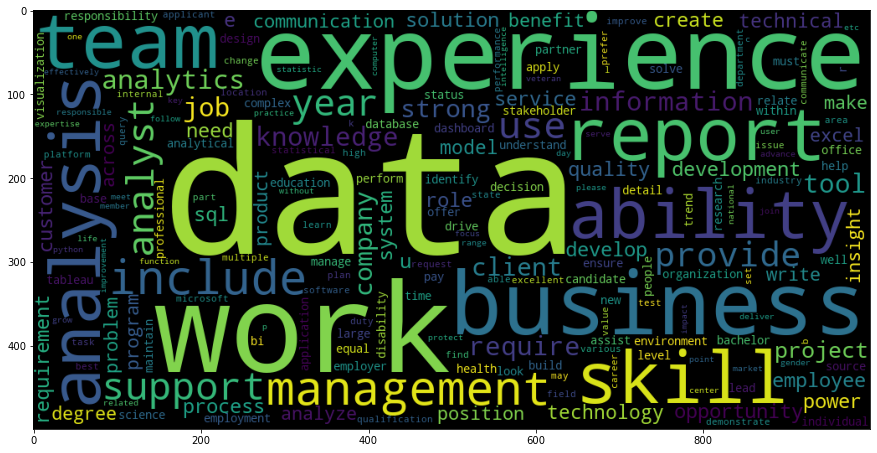

In [296]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(counts)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

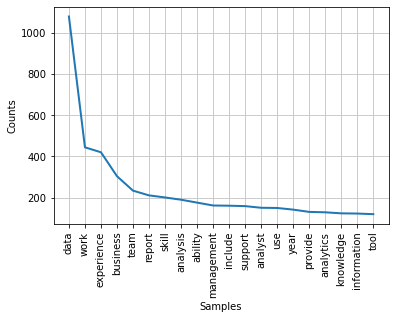

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [297]:
fq.plot(20)

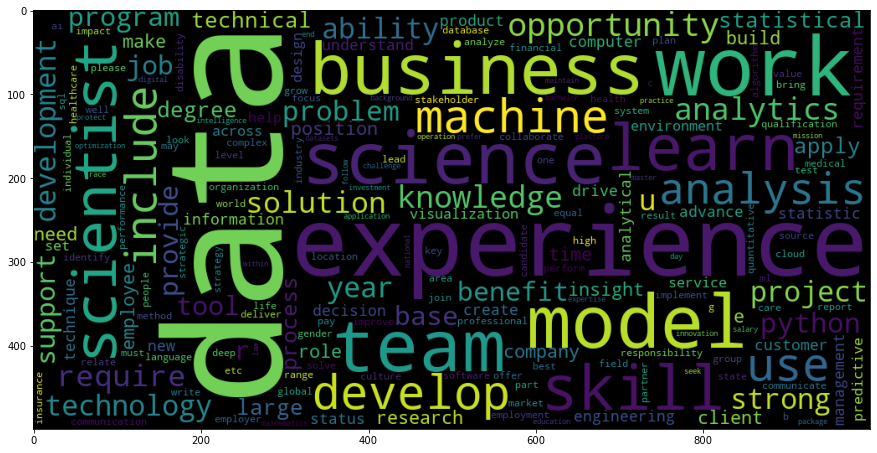

In [298]:
words = clean_text(sci)
fq = nltk.FreqDist(w for w in words if w.isalnum())
counts = dict(fq)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(counts)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

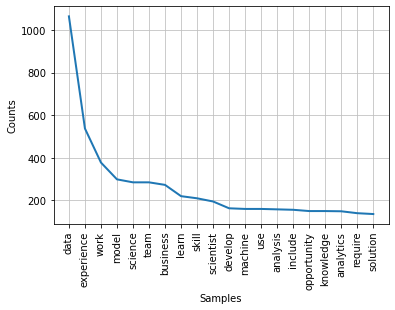

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [299]:
fq.plot(20)